In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/priyanka/Desktop/Major Project/Datasets/upload_DJIA_table.csv')
df.head()


,Date,Open,High,Low,Close,Volume,Adj Close
0,01-07-2016,17924.24023,18002.38086,17916.91016,17949.36914,82160000,17949.36914
1,30-06-2016,17712.75977,17930.60938,17711.80078,17929.99023,133030000,17929.99023
2,29-06-2016,17456.01953,17704.50977,17456.01953,17694.67969,106380000,17694.67969
3,28-06-2016,17190.50977,17409.72070,17190.50977,17409.72070,112190000,17409.72070
4,27-06-2016,17355.21094,17355.21094,17063.08008,17140.24023,138740000,17140.24023


In [3]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [4]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(df['Close']))

In [5]:
# Define threshold for outliers
threshold = 3

In [6]:
# Identify outliers
outliers = np.where(z_scores > threshold)[0]

In [7]:
# Remove outliers
df = df.drop(df.index[outliers])

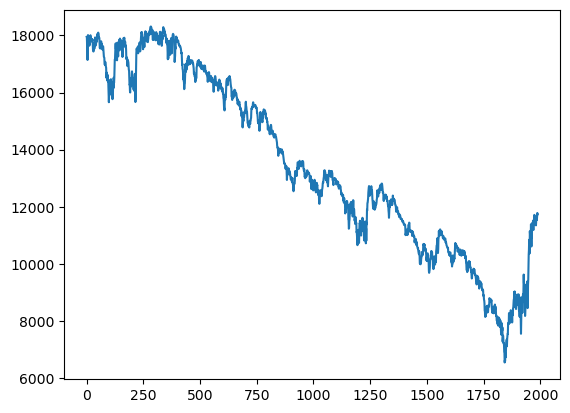

In [8]:
# Plot the data without outliers
plt.plot(df['Close'])

In [9]:
df.tail()


,Date,Open,High,Low,Close,Volume,Adj Close
1984,14-08-2008,11532.07031,11718.28027,11450.88965,11615.92969,159790000,11615.92969
1985,13-08-2008,11632.80957,11633.78027,11453.33984,11532.95996,182550000,11532.95996
1986,12-08-2008,11781.70020,11782.34961,11601.51953,11642.46973,173590000,11642.46973
1987,11-08-2008,11729.66992,11867.11035,11675.53027,11782.34961,183190000,11782.34961
1988,08-08-2008,11432.08984,11759.95996,11388.04004,11734.32031,212830000,11734.32031


In [10]:
df.size

13923

In [11]:
df = df.drop(['Adj Close'], axis = 1)
df.head()
# we are removing adj close column

,Date,Open,High,Low,Close,Volume
0,01-07-2016,17924.24023,18002.38086,17916.91016,17949.36914,82160000
1,30-06-2016,17712.75977,17930.60938,17711.80078,17929.99023,133030000
2,29-06-2016,17456.01953,17704.50977,17456.01953,17694.67969,106380000
3,28-06-2016,17190.50977,17409.72070,17190.50977,17409.72070,112190000
4,27-06-2016,17355.21094,17355.21094,17063.08008,17140.24023,138740000


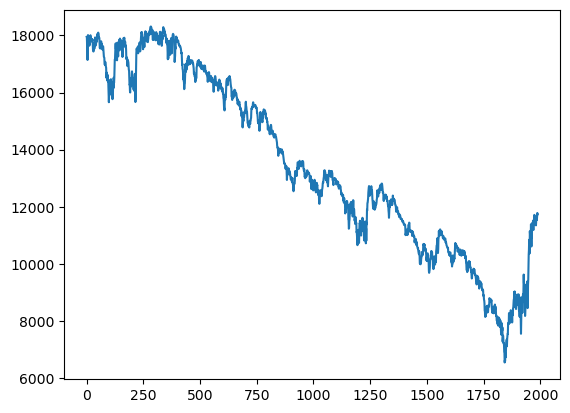

In [12]:
plt.plot(df.Close)
# predicting the closing price of a particular day
# This is a closing price VS time chart
# our model is based upon on the close column.

In [13]:
df.describe()
# description of the dataset

,Open,High,Low,Close,Volume
count,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03
mean,13459.116049,13541.303173,13372.931728,13463.032255,1.628110e+08
std,3143.281634,3136.271725,3150.420934,3144.006996,9.392343e+07
min,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06
25%,10907.339840,11000.980470,10824.759770,10913.379880,1.000000e+08
50%,13022.049810,13088.110350,12953.129880,13025.580080,1.351700e+08
75%,16477.699220,16550.070310,16392.769530,16478.410160,1.926000e+08
max,18315.060550,18351.359380,18272.560550,18312.390630,6.749200e+08


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1989 non-null   object 
 1   Open    1989 non-null   float64
 2   High    1989 non-null   float64
 3   Low     1989 non-null   float64
 4   Close   1989 non-null   float64
 5   Volume  1989 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 93.4+ KB


In [15]:
ma100 = df.Close.rolling(100).mean()
ma100
# moving average for this graph is finding out the average of the previous 100 day, it will get a value and is plotted in the graph.
# moving average will start from 101 index, therefore we require a rolling function.
# till 100th index it will be null.

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
1984    9623.818692
1985    9648.997295
1986    9675.893096
1987    9703.369688
1988    9732.948994
Name: Close, Length: 1989, dtype: float64

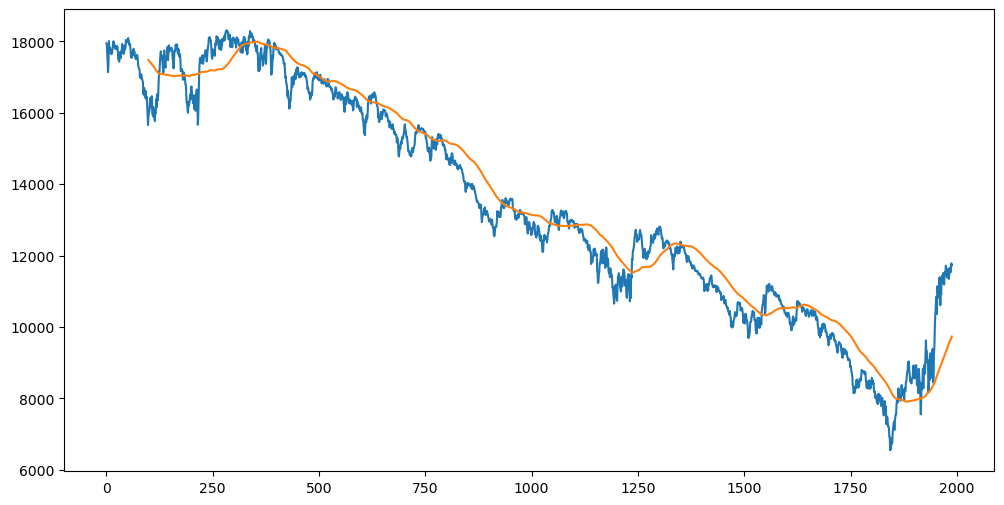

In [16]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100)
# plotting the moving average on closing graph 

In [17]:
ma200 = df.Close.rolling(200).mean()
ma200
# moving average is the average of particular timeframe
# we have defined 200 days moving average i.e it will take 200 days closing price and find average

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
1984    8765.630940
1985    8779.688538
1986    8795.399236
1987    8812.291985
1988    8829.463489
Name: Close, Length: 1989, dtype: float64

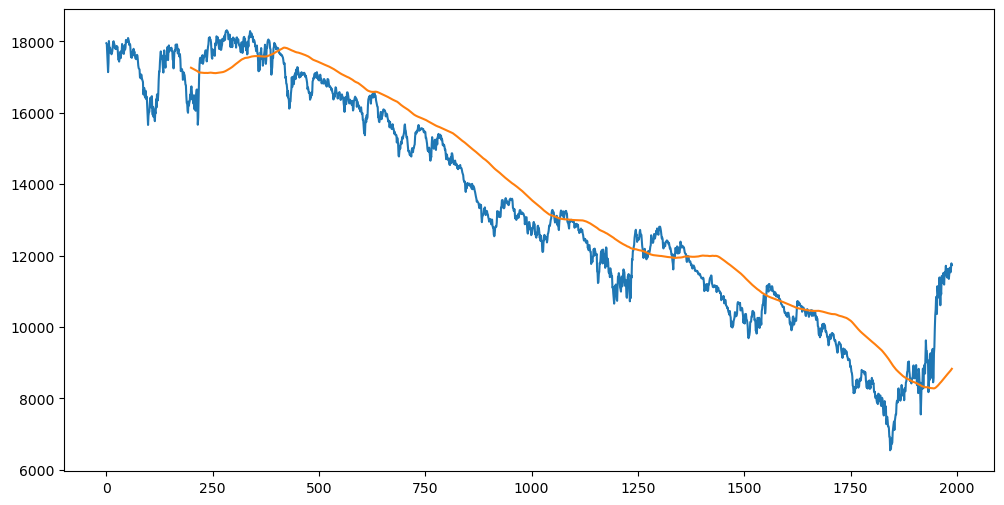

In [18]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma200)

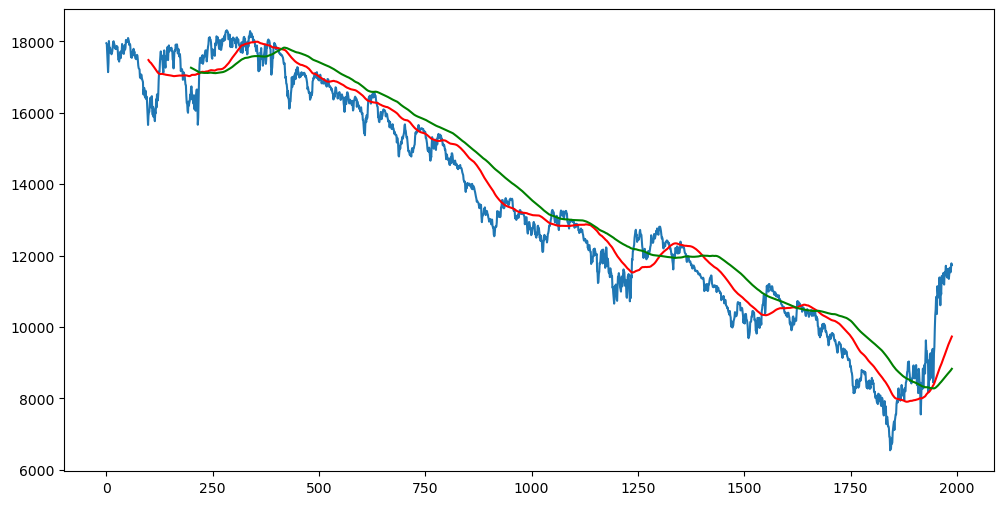

In [19]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
# if ma100 has crossed above the green line so its starting of an uptrend
# if ma100 has crossed below the green line so its an downtrend
# this is useful for analysing and predicting stock market trend.

In [20]:
ma300 = df.Close.rolling(300).mean()
ma300

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
1984    8904.119080
1985    8909.397746
1986    8914.734377
1987    8920.368241
1988    8926.162941
Name: Close, Length: 1989, dtype: float64

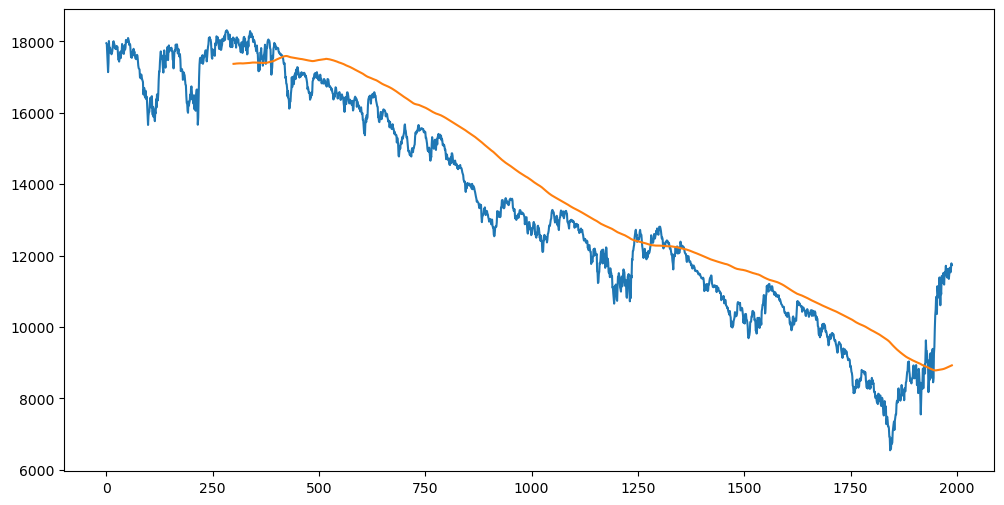

In [21]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma300)

In [22]:
df.shape

(1989, 6)

In [23]:
# split the data into training and testing

# create the dataframe for training data
# dataframe consists of close column starting from 0th index we need to go to 70% of the total value
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
# create the dataframe for testing data
# dataframe consists of close column starting from 70% of the total value and goes till complete length
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

# 70% is the training data and 30% is the testing data.
print(data_training.shape)
print(data_testing.shape)

(1392, 1)
(597, 1)


In [24]:
data_training.head()

,Close
0,17949.36914
1,17929.99023
2,17694.67969
3,17409.72070
4,17140.24023


In [25]:
data_testing.head()

,Close
1392,11478.12988
1393,11491.91016
1394,11499.25000
1395,11457.46973
1396,11476.54004


In [26]:
# we will be scaling down the data between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) # creating the object for minmaxscaler and define the feature range between 0 and 1

In [27]:
# fitting the training data into minmaxscaler and converted into an array, this fit_tranform will automatically generate the array
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.95259015],
       [0.95005931],
       [0.91932825],
       ...,
       [0.11991374],
       [0.11808537],
       [0.11464672]])

In [28]:
data_training_array.shape

(1392, 1)

In [29]:
import numpy as np

In [30]:
# for example we want to predict the price on the 11th day then it is dependent on the previous 10 days value i.e the 11th day price will be in between the range of the prev 10 days.
# suppose these are the 10 days price values 34 36 33 40 39 38 37 42 44 38 now the 11th day price can be 43 so now all the prev 10 days price will go into x_train and the predicted price of 11th day will be y_train.
# we can find for 100 days or more than that its our wish.
# now if we want to predict 12th day price then this 34 will go out i.e now 36 33 40 39 38 37 42 44 38 43 will be x_train and y_train is 42.

In [31]:
# we have created 2 lists x_train and y_train now we need to insert the values into them
# this is a time series analysis
x_train = [] 
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])# we have used comma because we want only 1 column
    
x_train, y_train = np.array(x_train), np.array(y_train) # we need to convert x_train and y_train into numpy arrays bec we need to send this into lstm
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [32]:
x_train.shape
# We have 1661 rows and 100 columns, 100 becoz we defines step as 100 that means first 100 values became columns becoz they need to act as features for predicting y_train

(1292, 100, 1)

In [33]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [34]:
model = Sequential() # create sequential model
# we have created 4 lstm layers
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
# input shape takes 100 columns and 1 is the number of columns as we r considering only Close for prediction 
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1)) # Dense layer for connecting all the layers and unit is 1 becoz we need to predict only closing price

In [35]:
model.summary() # summary of lstm model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [36]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 3)

Epoch 1/3
41/41 [==============================] - 27s 410ms/step - loss: 0.1073
Epoch 2/3
41/41 [==============================] - 16s 394ms/step - loss: 0.0172
Epoch 3/3
41/41 [==============================] - 15s 356ms/step - loss: 0.0144


In [37]:
model.save('keras_model.h5')

In [38]:
# model.save('keras_model.h5')

In [39]:
data_testing.head()
# inorder to predict 1761 index we require previous 100 days values which is present in training data so we need to fetch those 100 days from the training data and have to append that dataframe with this dataframe  

,Close
1392,11478.12988
1393,11491.91016
1394,11499.25000
1395,11457.46973
1396,11476.54004


In [40]:
data_training.tail(100)

,Close
1292,12595.75000
1293,12695.91992
1294,12630.03027
1295,12760.36035
1296,12684.67969
...,...
1387,11575.54004
1388,11555.03027
1389,11573.49023
1390,11559.49023


In [41]:
past_100_days = data_training.tail(100)
# for predicting the values for testing data we need the previous 100 days becoz for 1761 index we dont have the prev 100 days. As we cane see from the data_training.tail(100) these are the 100 days values which we need to append into data_testing

In [42]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\priyanka\AppData\Local\Temp\ipykernel_10172\531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [43]:
final_df.head()

,Close
0,12595.75000
1,12695.91992
2,12630.03027
3,12760.36035
4,12684.67969


In [44]:
# this testing data i.e final_df is not scaled so we have to scale it.
input_data = scaler.fit_transform(final_df)
input_data

array([[0.96570761],
       [0.98170028],
       [0.97118064],
       [0.99198854],
       [0.97990572],
       [0.97257123],
       [0.96385879],
       [0.98611637],
       [0.9995162 ],
       [0.99949235],
       [1.        ],
       [0.9924594 ],
       [0.9809084 ],
       [0.96564696],
       [0.94720832],
       [0.95137698],
       [0.94300302],
       [0.91318099],
       [0.90277782],
       [0.92516793],
       [0.91611871],
       [0.91385796],
       [0.91267489],
       [0.93143923],
       [0.93126991],
       [0.93597023],
       [0.93872585],
       [0.93348123],
       [0.9344599 ],
       [0.93073825],
       [0.9216396 ],
       [0.92656974],
       [0.91513833],
       [0.9021855 ],
       [0.90581127],
       [0.89782367],
       [0.88432639],
       [0.87356727],
       [0.87642517],
       [0.84800479],
       [0.83460496],
       [0.80885414],
       [0.84750992],
       [0.86950089],
       [0.87768167],
       [0.86813587],
       [0.90461385],
       [0.904

In [45]:
input_data.shape

(697, 1)

In [46]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0]) # this 0 is closing price column
    
#x_train, y_train = np.array(x_train), np.array(y_train)

In [47]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(597, 100, 1)
(597,)


In [48]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [49]:
# Making predictions
y_predicted = model.predict(x_test)
y_predicted = scaler.fit_transform(y_predicted)

19/19 [==============================] - 4s 145ms/step


In [50]:
rmse = np.sqrt(np.mean(((y_predicted - y_test) ** 2)))
rmse

0.33495170067066604

In [51]:
print("Accuracy of LSTM is :", 1.96 * rmse)

Accuracy of LSTM is : 0.6565053333145054


In [52]:
# import math
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# rmse = math.sqrt(mean_squared_error(y_test, y_predicted))
# print(f'RMSE: {rmse}')

# rmse = np.sqrt(np.mean((y_test-y_predicted)**2))
# print(rmse)


In [53]:
y_predicted.shape

(597, 1)

In [54]:
y_test

array([0.78727353, 0.78947363, 0.79064547, 0.78397503, 0.7870197 ,
       0.77935936, 0.77644737, 0.77001952, 0.77040603, 0.76827937,
       0.76876317, 0.77194022, 0.76879825, 0.75177422, 0.71189857,
       0.71931787, 0.72560508, 0.74083782, 0.7167442 , 0.73944879,
       0.74343534, 0.73987194, 0.71219558, 0.71468942, 0.74318307,
       0.74168397, 0.7561359 , 0.76794089, 0.76629802, 0.77589169,
       0.7818373 , 0.78036204, 0.74528416, 0.74106764, 0.73083379,
       0.72985512, 0.72913028, 0.73109884, 0.73799271, 0.73712895,
       0.73210137, 0.73433826, 0.72817547, 0.7075241 , 0.73387847,
       0.72096073, 0.72603618, 0.72627722, 0.71419455, 0.71258833,
       0.71197216, 0.70272805, 0.70577273, 0.70211172, 0.67122636,
       0.68374496, 0.67709853, 0.68463912, 0.68828875, 0.6809287 ,
       0.68862724, 0.65704104, 0.66931688, 0.67278471, 0.67160164,
       0.64832859, 0.64624995, 0.64272163, 0.63533913, 0.63815539,
       0.62516577, 0.61757747, 0.61307032, 0.60567519, 0.62279

In [55]:
y_predicted

array([[9.99999940e-01],
       [9.95138228e-01],
       [9.90331948e-01],
       [9.85588253e-01],
       [9.80908334e-01],
       [9.76298511e-01],
       [9.71757472e-01],
       [9.67280209e-01],
       [9.62853849e-01],
       [9.58468139e-01],
       [9.54115093e-01],
       [9.49792683e-01],
       [9.45509851e-01],
       [9.41277087e-01],
       [9.37082946e-01],
       [9.32855427e-01],
       [9.28522766e-01],
       [9.24037635e-01],
       [9.19396222e-01],
       [9.14587200e-01],
       [9.09638464e-01],
       [9.04603302e-01],
       [8.99539530e-01],
       [8.94464910e-01],
       [8.89389098e-01],
       [8.84359300e-01],
       [8.79432261e-01],
       [8.74684513e-01],
       [8.70208681e-01],
       [8.66087019e-01],
       [8.62397373e-01],
       [8.59208882e-01],
       [8.56566608e-01],
       [8.54442418e-01],
       [8.52767646e-01],
       [8.51443470e-01],
       [8.50366175e-01],
       [8.49438608e-01],
       [8.48580778e-01],
       [8.47740948e-01],


In [56]:
scaler.scale_ # again scale them up by using this scaler.scale_ which gives the factor at which all these have scaled down

array([1.4588879], dtype=float32)

In [57]:
# we need to divide y_predicted and y_test by thi factor i.e 0.00794171
scale_factor = 1/1.5785754
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

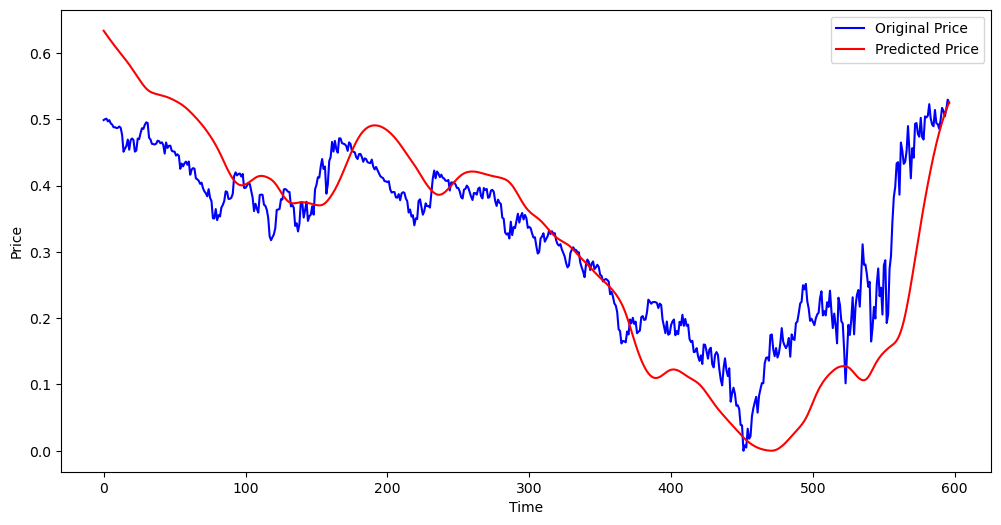

In [58]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
# we can see the offset which is the difference between the original and predicted and we have less offset so its good.

In [59]:
df.isnull().sum()


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
#from xgboost.xgbclassifier import XGBClassifier
#from xgboost import XGBClassifier
from sklearn import metrics
 
import warnings
warnings.filterwarnings('ignore')

In [61]:
# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")


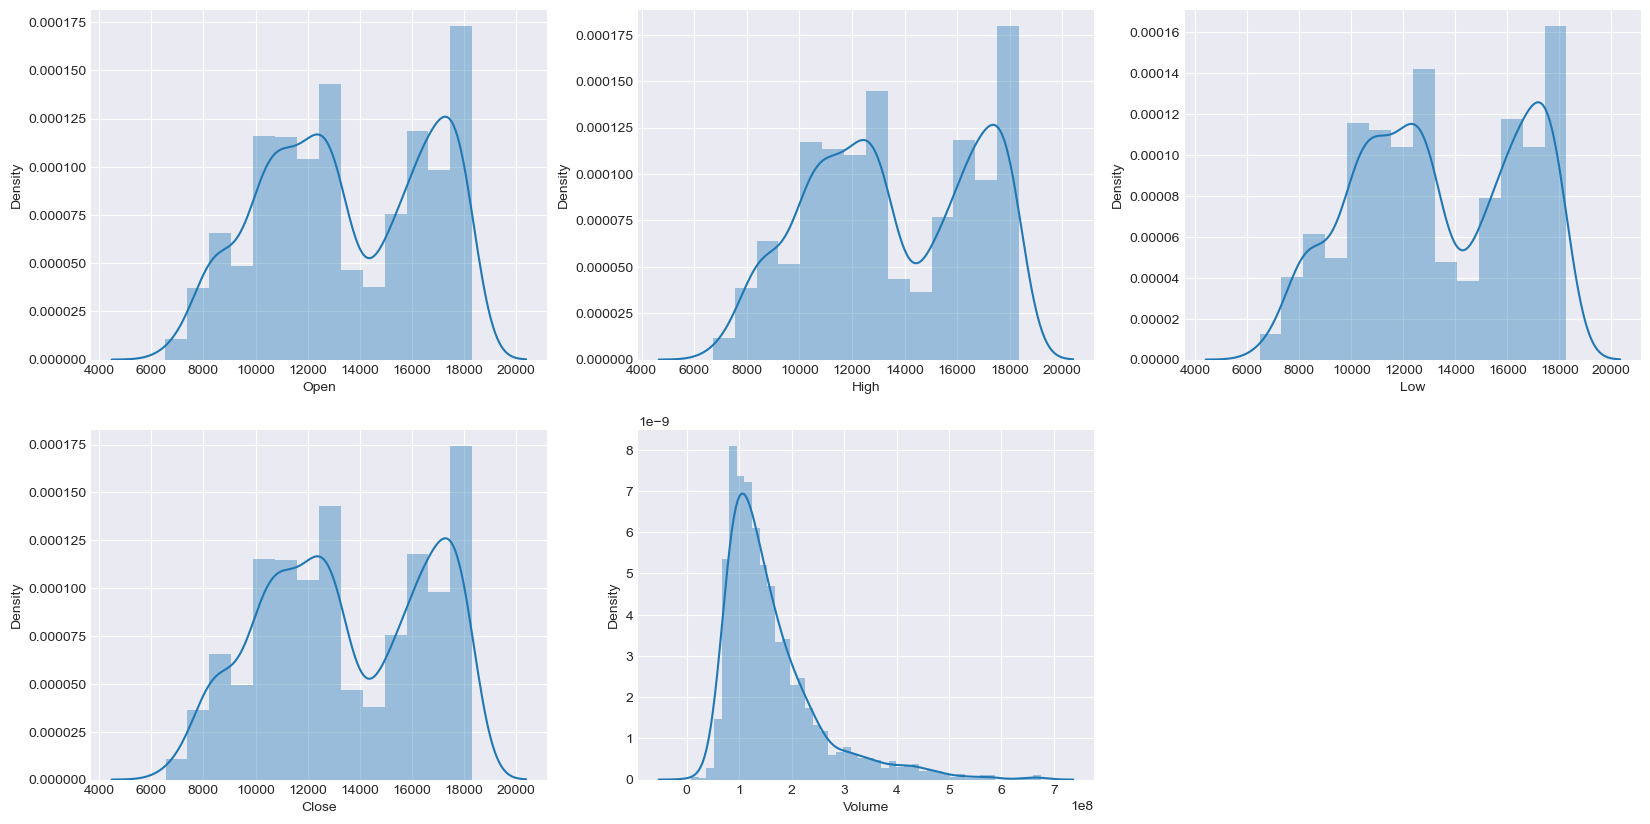

In [62]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])
plt.show()


In [63]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

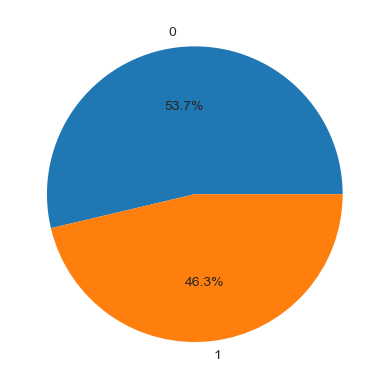

In [64]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

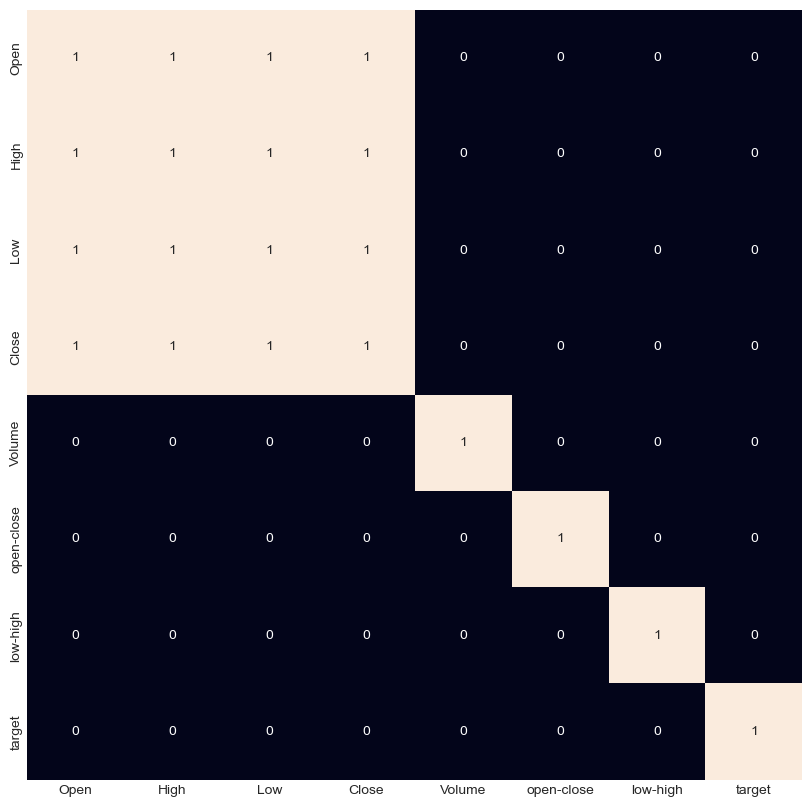

In [65]:
plt.figure(figsize=(10, 10))
 
# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [66]:
features = df[['open-close', 'low-high']]
target = df['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.1, random_state=5)
print(x_train.shape, x_test.shape)

(1790, 2) (199, 2)


In [67]:
from sklearn.svm import SVC

svm = SVC(random_state = 1)
svm.fit(x_train,y_train)
# y_pred = svm.predict(X_valid)
print("accuracy of svm is :",svm.score(x_test,y_test))

accuracy of svm is : 0.9899497487437185


In [68]:
y_pred = svm.predict(x_test)

In [69]:
rmse = np.sqrt(np.mean((y_test-y_pred)**2))
print(rmse)

0.1002509414234171


In [70]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
#y_pred = dt.predict(X_test)
print('Accuracy of Decision Tree is:',dt.score(x_test,y_test))

Accuracy of Decision Tree is: 0.9748743718592965


In [71]:
y_pred = dt.predict(x_test)

In [72]:
rmse = np.sqrt(np.mean((y_test-y_pred)**2))
print(rmse)

0.15851065623706034


In [73]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train)
print('accuracy of Naive Bayes in test data is :', nb.score(x_test,y_test))

accuracy of Naive Bayes in test data is : 0.9045226130653267


In [74]:
y_pred = nb.predict(x_test)

In [75]:
rmse = np.sqrt(np.mean((y_test-y_pred)**2))
print(rmse)

0.3089941535606675


In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier

pipeline = make_pipeline(StandardScaler(),
                        LogisticRegression(random_state=1))



In [77]:
# Instantiate the bagging classifier
#
bgclassifier = BaggingClassifier(base_estimator=pipeline, n_estimators=10,
                                 max_features=0.9,
                                 max_samples=1000,
                                 random_state=20, n_jobs=10
                                
                                
                                )

In [78]:
# Fit the bagging classifier

bgclassifier.fit(x_train, y_train)

BaggingClassifier(base_estimator=Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('logisticregression',
                                                  LogisticRegression(random_state=1))]),
                  max_features=0.9, max_samples=1000, n_jobs=10,
                  random_state=20)

In [79]:
print('Accuracy: %.3f ' %bgclassifier.score(x_test, y_test))

Accuracy: 0.990 


In [80]:
y_pred = bgclassifier.predict(x_test)

In [81]:
rmse = np.sqrt(np.mean((y_test-y_pred)**2))
print(rmse)

0.1002509414234171
